In [1]:
from VAE import Encoder, Decoder, Discriminator, VAEGANTrainer, GAN_,GAN, visualize_reconstruction
from tensorflow.keras.datasets import mnist
import numpy as np

# Инициализация
# Инициализация
# Подготовка данных
def preprocess_data(x):
    x = x.astype('float32') / 255.0
    return x.reshape(x.shape[0], -1)

# Загрузка данных MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = preprocess_data(x_train)


In [2]:

# Инициализация моделей
encoder = Encoder(learning_rate= 1e-4) # Ниже 1e-6 значения kl улаетает \
decoder = Decoder(learning_rate=1e-5)
# Обучение
trainer_VAE = VAEGANTrainer(encoder, decoder, beta=0.02) #0.05



In [3]:
trainer_VAE.train(x_train, batch_size=8, epochs = 5) #20
visualize_reconstruction(decoder=decoder, encoder=encoder, test_data=x_test)

KeyboardInterrupt: 

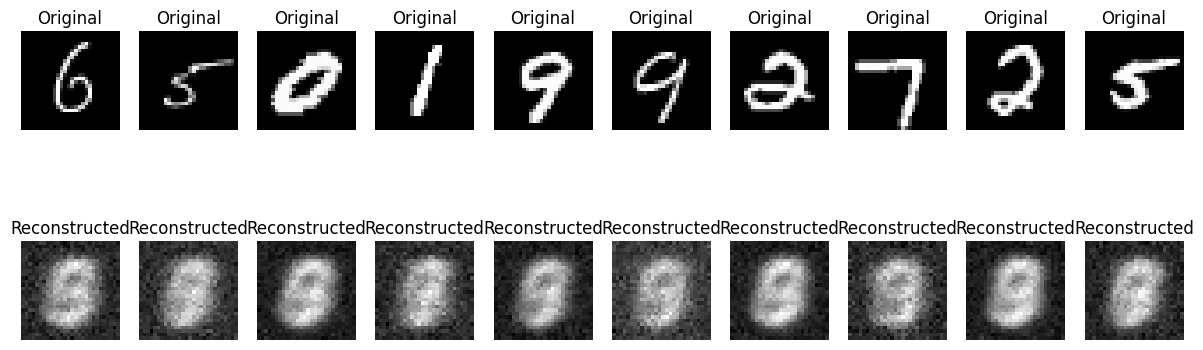

Epoch 1/3 - Recon Loss: 62.0569 - KL Loss: 0.3029


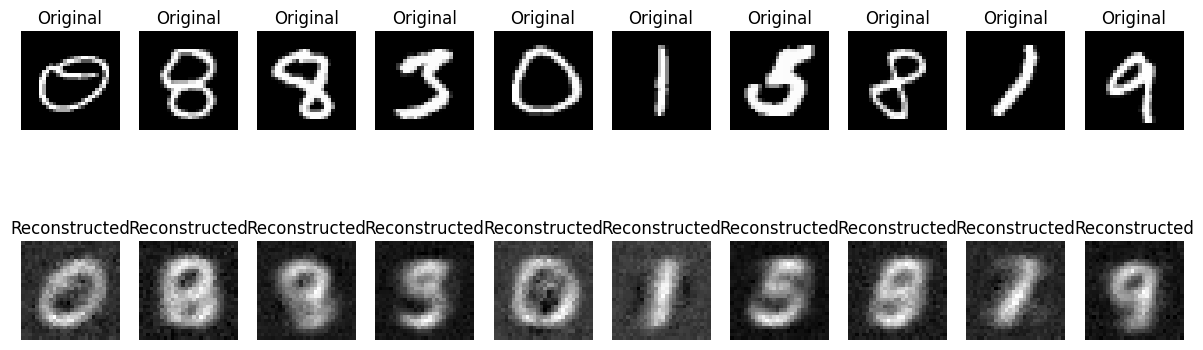

Epoch 2/3 - Recon Loss: 43.5581 - KL Loss: 0.8044


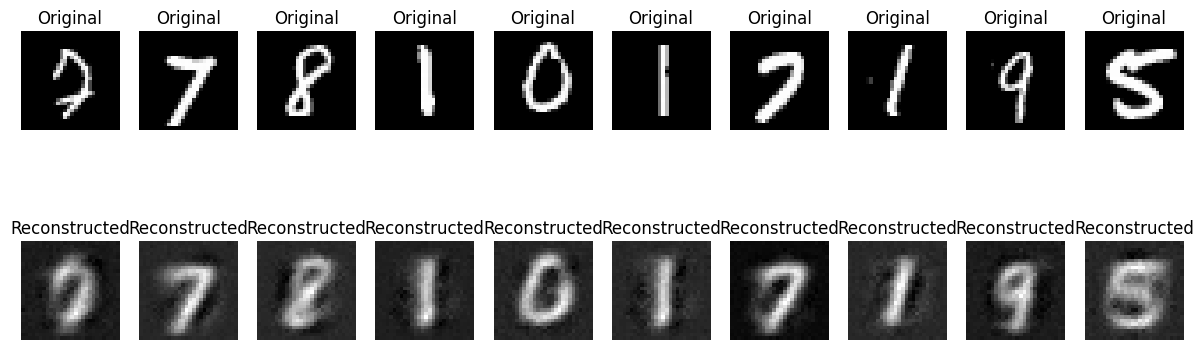

Epoch 3/3 - Recon Loss: 28.6990 - KL Loss: 2.1000


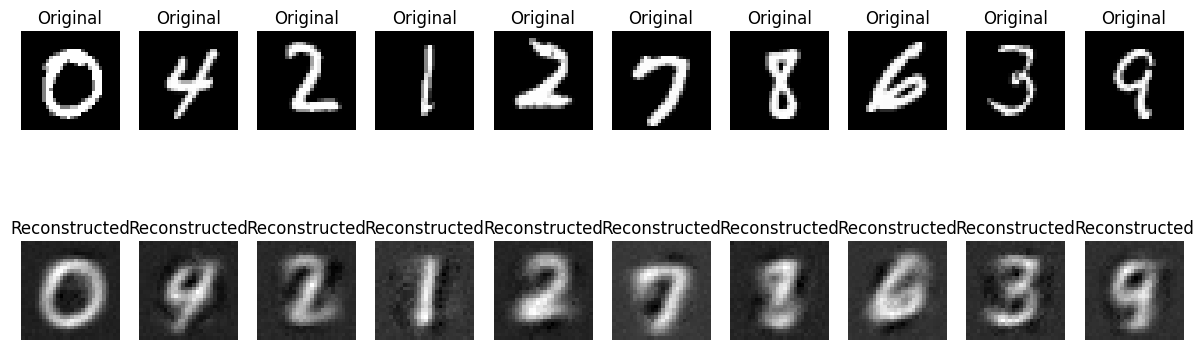

In [4]:
trainer_VAE.train(x_train, batch_size=16, epochs = 3) #20
visualize_reconstruction(decoder=decoder, encoder=encoder, test_data=x_test)

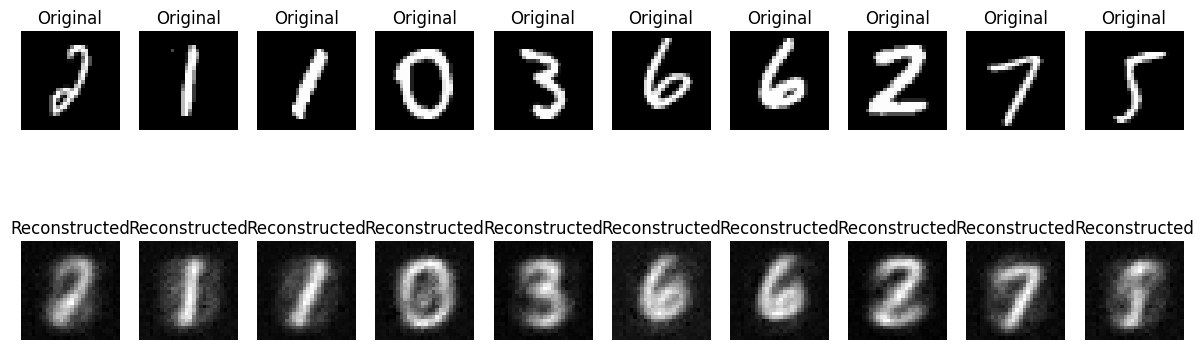

Epoch 1/2 D Loss: 1.4616 - G loss: 0.5188 


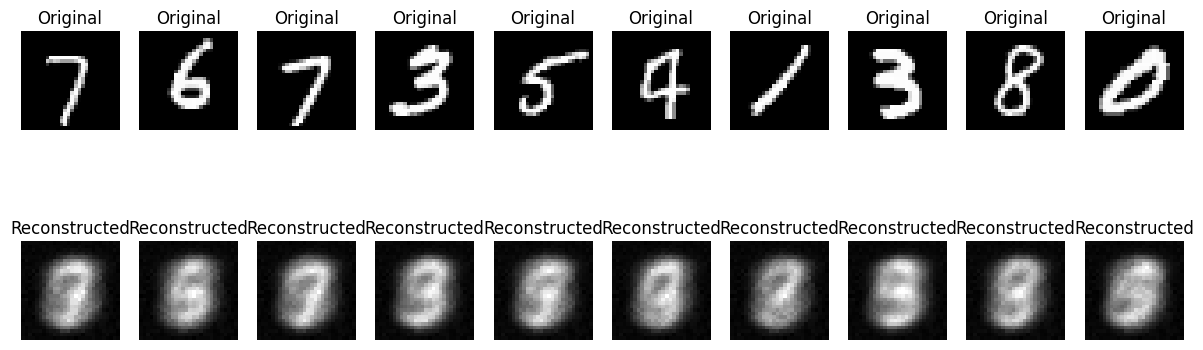

Epoch 2/2 D Loss: 1.6287 - G loss: 0.4259 


In [5]:
discriminator = Discriminator(learning_rate=1e-8) #1e-7
trainer_VAE.decoder.lr = 1e-5
trainer_GAN = GAN('',trainer_VAE, discriminator=discriminator)
trainer_GAN.train(x_train=x_train, batch_size=16, epochs=2)

In [6]:
'''trainer_VAE.dec_lam = 2
trainer_VAE.beta = 0.0001'''
discriminator = Discriminator(learning_rate=1e-8)
trainer_GAN = GAN_("h", trainer_VAE, discriminator=discriminator)
trainer_GAN.train(x_train=x_train, batch_size=16, epochs=10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Aleks\anaconda3\envs\neura\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Aleks\AppData\Local\Temp\ipykernel_8412\3401469618.py", line 5, in <module>
    trainer_GAN.train(x_train=x_train, batch_size=16, epochs=10)
  File "c:\Users\Aleks\Documents\Neura\lab4\VAE.py", line 340, in train
  File "c:\Users\Aleks\Documents\Neura\lab4\VAE.py", line 313, in forward
    real_preds = self.discriminator.forward(x)
  File "c:\Users\Aleks\Documents\Neura\lab4\VAE.py", line 390, in forward
    z , self.eps = self.encoder.reparameterize(mu, logvar)
  File "c:\Users\Aleks\Documents\Neura\lab4\VAE.py", line 109, in forward
    else:
  File "c:\Users\Aleks\Documents\Neura\lab4\VAE.py", line 45, in forward
    z = np.dot(X, self.W.T) + self.b
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent ca

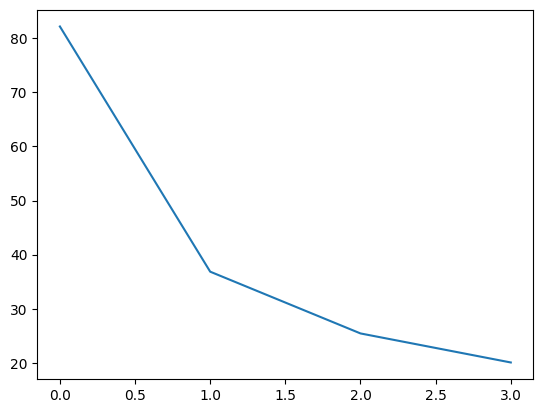

In [6]:
import matplotlib.pyplot as plt
plt.plot(trainer_VAE.recon_loss_history)

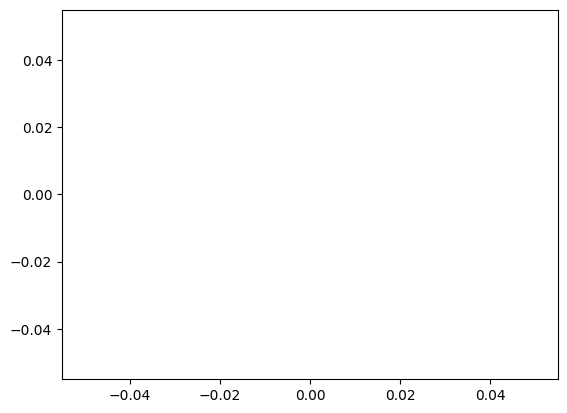

In [7]:
import matplotlib.pyplot as plt
plt.plot(trainer_GAN.total_g_loss)